In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
user_log = pd.read_csv('data_format1/user_log_format1.csv', iterator=True, chunksize=1000)
user_log = pd.concat([chunk[chunk['item_id'] < 160] for chunk in user_log])


In [3]:
print(user_log.size)
user_log.head()

63889


,user_id,item_id,cat_id,seller_id,brand_id,time_stamp,action_type
9553,283204,31,662,3984,7610.0,703,0
19730,106446,129,1329,1058,4712.0,1110,0
19779,106446,129,1329,1058,4712.0,1110,0
19789,106446,129,1329,1058,4712.0,1110,0
35981,295759,82,662,3296,8297.0,605,0


In [4]:
user_log.isnull().any()

user_id        False
item_id        False
cat_id         False
seller_id      False
brand_id        True
time_stamp     False
action_type    False
dtype: bool

<AxesSubplot:xlabel='cat_id', ylabel='Count'>

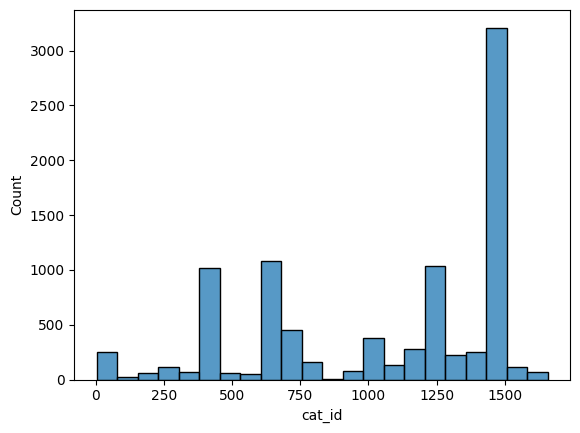

In [33]:
sns.histplot(user_log['cat_id'])

<AxesSubplot:xlabel='time_stamp', ylabel='Count'>

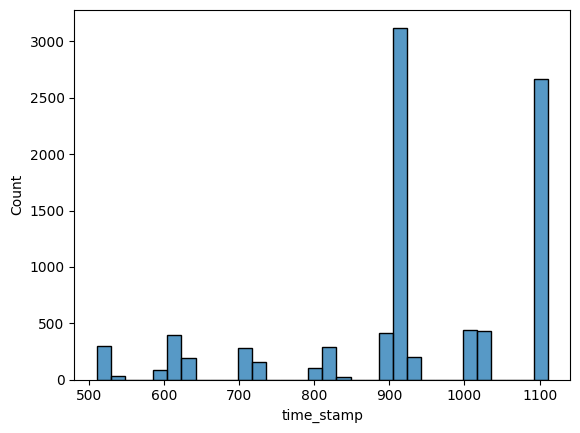

In [35]:
sns.histplot(user_log['time_stamp'])

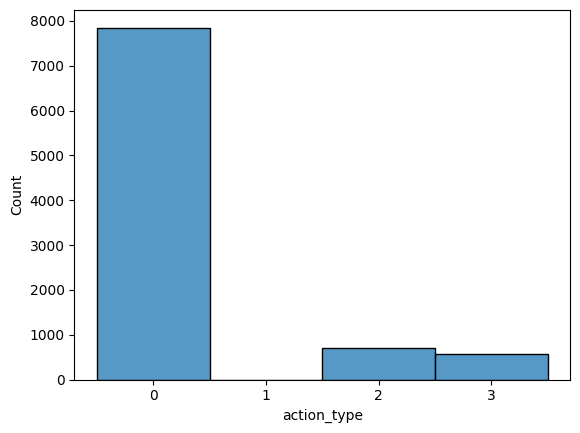

In [95]:
bins = np.arange(-0.5, 4, 1)
sns.histplot(user_log['action_type'], bins=bins)

plt.xticks([0,1,2,3])
plt.show()

In [67]:
train_df = pd.read_csv('./data_format1/train_format1.csv', iterator=True)
test_df = pd.read_csv('./data_format1/test_format1.csv', iterator=True)
user_info = pd.read_csv('./data_format1/user_info_format1.csv', iterator=True)

train_df = pd.concat([chunk[chunk['user_id'].isin(user_log['user_id'])] for chunk in train_df])
test_df = pd.concat([chunk[chunk['user_id'].isin(user_log['user_id'])] for chunk in test_df])
user_info = pd.concat([chunk[chunk['user_id'].isin(user_log['user_id'])] for chunk in user_info])


In [68]:
print(user_info.size)

user_info.head()

14934


,user_id,age_range,gender
91,83378,4.0,0.0
435,68632,4.0,0.0
473,1372,5.0,0.0
594,247820,5.0,2.0
684,18038,4.0,1.0


In [69]:
print(train_df.size)

train_df.head()

9828


,user_id,merchant_id,label
229,144768,3578,0
247,409728,1023,0
248,409728,2436,0
278,153984,2102,0
279,153984,4044,0


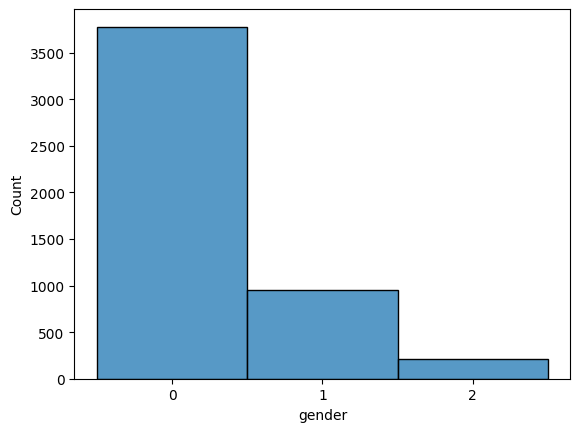

In [70]:
bins = np.arange(-0.5, 3, 1)
sns.histplot(user_info['gender'], bins=bins)

plt.xticks([0,1,2])
plt.show()

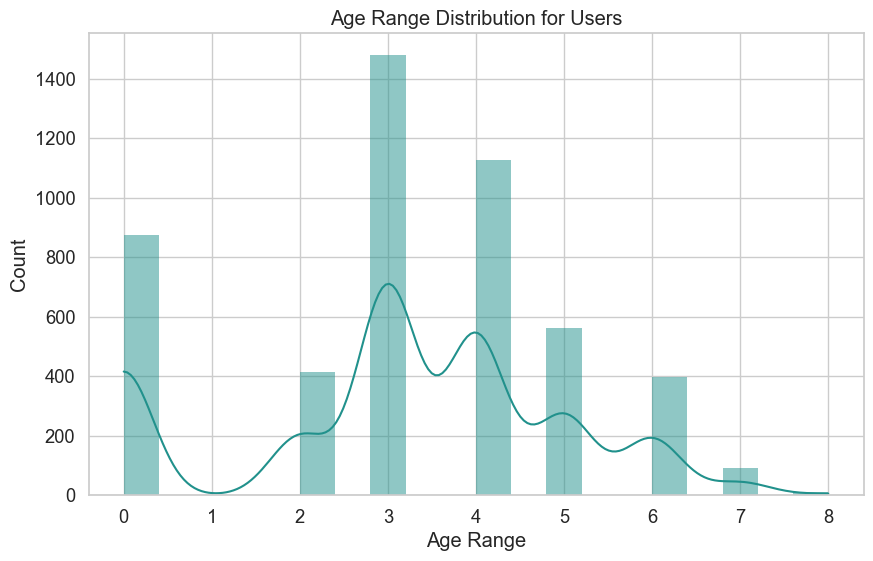

In [106]:
# Set the style and context for the plot
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.2)

# Create a custom color palette
palette = sns.color_palette("viridis", n_colors=1)

# Define the plot
plt.figure(figsize=(10, 6))
sns.histplot(user_info['age_range'], bins=20, kde=True, color=palette[0], linewidth=0)

# Customize labels and title
plt.xlabel('Age Range')
plt.ylabel('Count')
plt.title('Age Range Distribution for Users')

# Show the plot
plt.show()

In [72]:
women_range = user_info[user_info['gender'] == 0]
men_range = user_info[user_info['gender'] == 1]

print(women_range.size)
print(men_range.size)

11331
2859


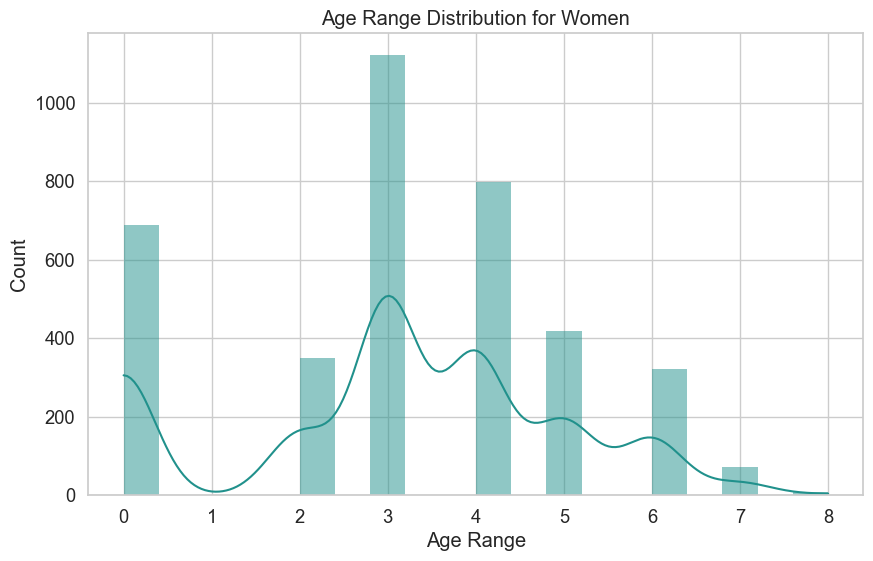

In [105]:
# Set the style and context for the plot
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.2)

# Create a custom color palette
palette = sns.color_palette("viridis", n_colors=1)

# Define the plot
plt.figure(figsize=(10, 6))
sns.histplot(women_range['age_range'], bins=20, kde=True, color=palette[0], linewidth=0)

# Customize labels and title
plt.xlabel('Age Range')
plt.ylabel('Count')
plt.title('Age Range Distribution for Women')

# Show the plot
plt.show()

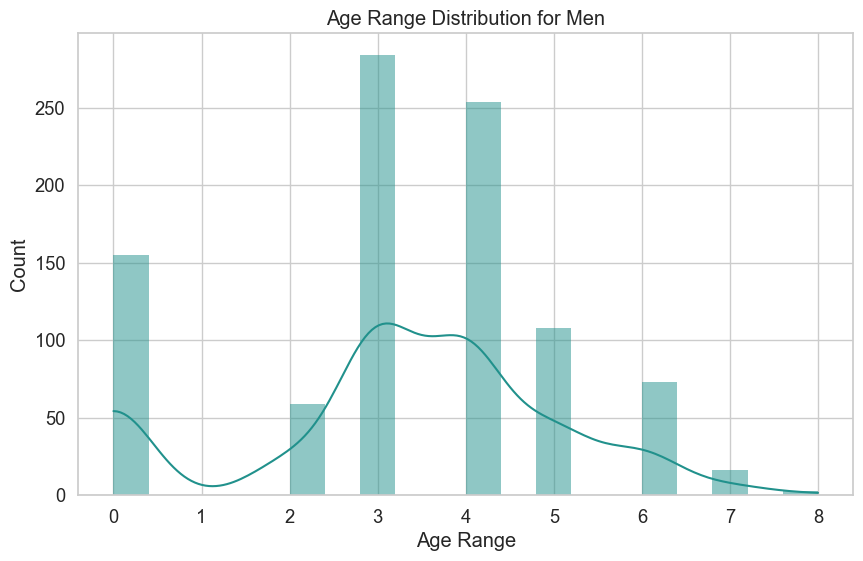

In [104]:
# Set the style and context for the plot
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.2)

# Create a custom color palette
palette = sns.color_palette("viridis", n_colors=1)

# Define the plot
plt.figure(figsize=(10, 6))
sns.histplot(men_range['age_range'], bins=20, kde=True, color=palette[0], linewidth=0)

# Customize labels and title
plt.xlabel('Age Range')
plt.ylabel('Count')
plt.title('Age Range Distribution for Men')

# Show the plot
plt.show()

In [96]:
x = user_log.groupby(['item_id','user_id']).size().reset_index(name='counts')

x.head()

,item_id,user_id,counts
0,1,370926,1
1,2,28,1
2,2,138,1
3,2,234,1
4,2,1076,2


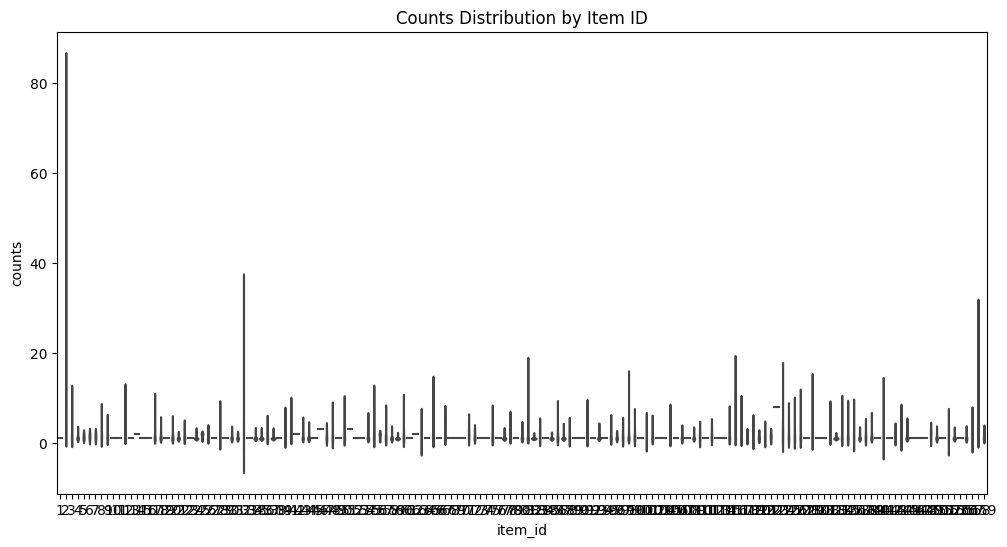

In [99]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.violinplot(x='item_id', y='counts', data=x_sorted, inner=None)
ax.set_title('Counts Distribution by Item ID')
plt.show()

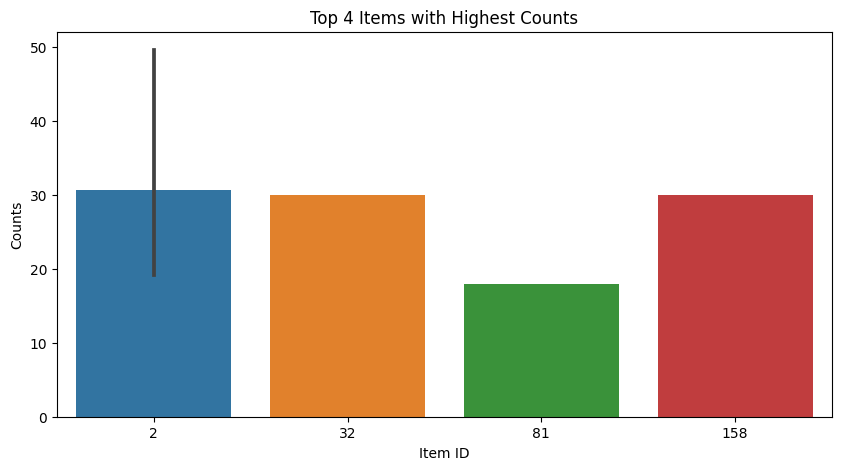

In [102]:
# Get the top 4 items based on the counts
top_items = x.nlargest(10, 'counts')

# Visualize using a bar plot with Seaborn
plt.figure(figsize=(10, 5))
sns.barplot(x='item_id', y='counts', data=top_items)
plt.xlabel('Item ID')
plt.ylabel('Counts')
plt.title('Top 4 Items with Highest Counts')
plt.show()

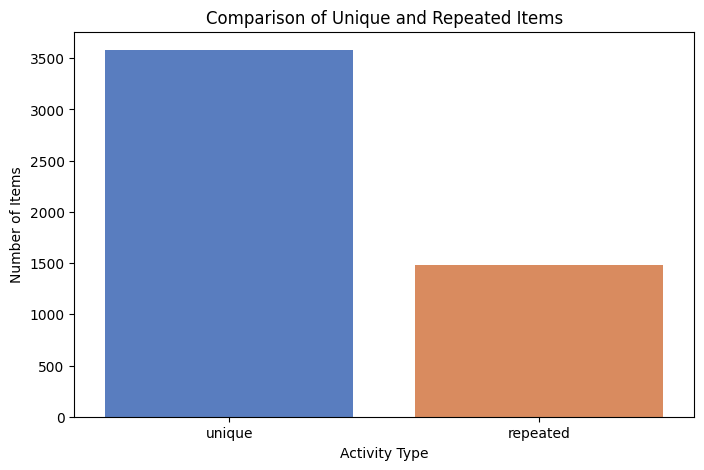

In [103]:
activity_data = pd.DataFrame({'Activity Type': ['unique', 'repeated'],
                              'Number of Items': [unique_items_act.size, repeated_items_act.size]})

plt.figure(figsize=(8, 5))
sns.barplot(x='Activity Type', y='Number of Items', data=activity_data, palette='muted')
plt.title('Comparison of Unique and Repeated Items')
plt.show()

In [77]:
user_cat_count = user_log.groupby(['user_id','cat_id']).size().reset_index(name='counts')

user_cat_count.head()

,user_id,cat_id,counts
0,28,1467,2
1,69,737,8
2,114,1429,1
3,138,1467,1
4,234,1467,1


<BarContainer object of 5953 artists>

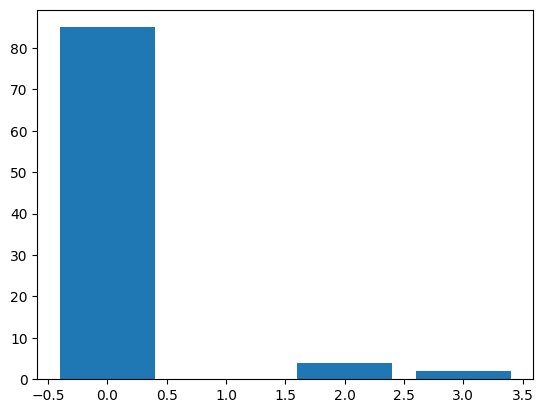

In [78]:
user_cat_click_count = user_log.groupby(['user_id','cat_id','action_type']).size().reset_index(name='counts')

user_cat_click_count.head()
plt.bar(user_cat_click_count['action_type'], user_cat_click_count['counts'])

In [79]:
cat_click_count = user_log.groupby(['cat_id','action_type']).size().reset_index(name='counts')
cat_click_count.head()

,cat_id,action_type,counts
0,4,0,27
1,11,0,78
2,11,2,6
3,11,3,7
4,35,0,1


In [80]:
brand_click_count = user_log.groupby(['brand_id','action_type']).size().reset_index(name='counts')
brand_click_count.head()

,brand_id,action_type,counts
0,24.0,0,23
1,24.0,2,5
2,82.0,0,598
3,82.0,2,32
4,82.0,3,29


In [81]:
item_click_count = user_log.groupby(['item_id','action_type']).size().reset_index(name='counts')
item_click_count.head()


,item_id,action_type,counts
0,1,0,1
1,2,0,2497
2,2,2,338
3,2,3,256
4,3,0,110


In [82]:
seller_click_count = user_log.groupby(['seller_id','action_type']).size().reset_index(name='counts')
seller_click_count.head()

,seller_id,action_type,counts
0,1,0,43
1,1,2,1
2,1,3,2
3,3,0,1
4,20,0,1


In [83]:
print(train_df.size)

train_df.head()

9828


,user_id,merchant_id,label
229,144768,3578,0
247,409728,1023,0
248,409728,2436,0
278,153984,2102,0
279,153984,4044,0


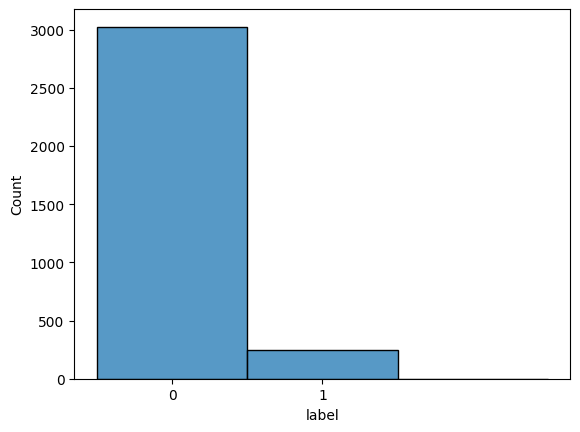

In [84]:

bins = np.arange(-0.5, 3, 1)
sns.histplot(train_df['label'], bins=bins)

plt.xticks([0,1])
plt.show()

In [85]:
repeat_buy = train_df.groupby(["merchant_id"])["label"].mean().reset_index(name='mean')
repeat_buy = repeat_buy[repeat_buy['mean'] > 0]
repeat_buy.head()

,merchant_id,mean
3,14,0.500000
10,66,0.142857
12,71,0.250000
16,102,0.333333
22,121,0.055556


C:\Users\Gabe\AppData\Local\Temp\ipykernel_11844\4228871291.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(repeat_buy,fit=norm)


<AxesSubplot:ylabel='Density'>

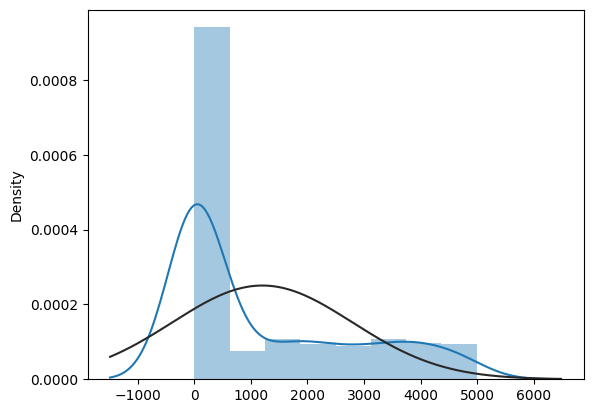

In [86]:
from scipy.stats import norm
sns.distplot(repeat_buy,fit=norm)